In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import os
import sys
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/inverse-problem"
util_loc = os.path.join(root, "utils")
data_loc = os.path.join(root, "data")
sys.path.append(util_loc)
from utilities import InverseNeuralNet, InverseDataModule, ScaledData, see_results

In [17]:
#Get model
check_dir = "neural-nets/hyperparameter-tuning/logs/long-arch-search-1/[301, 256, 192, 128, 64, 3],0.005,1024,0.5/version_0/checkpoints"
check_dir = os.path.join(root, check_dir)
check_file = os.path.join(check_dir, os.listdir(check_dir)[0])
best_model = InverseNeuralNet.load_from_checkpoint(check_file)
print(best_model)

InverseNeuralNet(
  (forward_prop): Sequential(
    (0): Linear(in_features=301, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=192, bias=True)
    (3): ReLU()
    (4): Linear(in_features=192, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=3, bias=True)
  )
)


In [12]:
all_data = ScaledData(data_loc)
test_dos = all_data.test_dos
test_params = all_data.test_params

In [57]:
test_dos_tensor = torch.from_numpy(test_dos).float()
predicted = best_model(test_dos_tensor).detach().numpy()

mse_mat = (predicted - test_params) ** 2
mse_list = np.mean(mse_mat, axis = 1)
mse_params = zip(mse_list, predicted, test_params)
mse_params = sorted(mse_params, key = lambda x : x[0], reverse = True)
num_points = len(mse_list)

In [75]:
print("Neural net results on test set:")
for i in range (10):
    index = i * (num_points // 100)
    print(f"{i} percentile: ")
    
    t1_pred, t2_pred, j_pred = mse_params[index][1]
    t1, t2, j = mse_params[index][2]
    
    print(f"Neural net predicted: t1: {t1_pred:.4f}, t2: {t2_pred:.4f}, j: {j_pred:.4f}")
    print(f"Ground truth: t1: {t1}, t2: {t2}, j: {j}")
    print()

Neural net results on test set:
0 percentile: 
Neural net predicted: t1: -0.1908, t2: -0.1171, j: 0.7388
Ground truth: t1: -0.18, t2: -0.14, j: 0.744

1 percentile: 
Neural net predicted: t1: 0.4194, t2: -0.3445, j: 0.3126
Ground truth: t1: 0.42, t2: -0.34, j: 0.312

2 percentile: 
Neural net predicted: t1: -0.3990, t2: -0.4163, j: 0.2011
Ground truth: t1: -0.4, t2: -0.42, j: 0.2

3 percentile: 
Neural net predicted: t1: -0.4573, t2: -0.3424, j: 0.7913
Ground truth: t1: -0.46, t2: -0.34, j: 0.792

4 percentile: 
Neural net predicted: t1: 0.1577, t2: -0.4979, j: 0.2466
Ground truth: t1: 0.16, t2: -0.5, j: 0.248

5 percentile: 
Neural net predicted: t1: 0.5028, t2: -0.4605, j: 0.3104
Ground truth: t1: 0.5, t2: -0.46, j: 0.312

6 percentile: 
Neural net predicted: t1: -0.4821, t2: -0.0408, j: 0.5061
Ground truth: t1: -0.48, t2: -0.04, j: 0.504

7 percentile: 
Neural net predicted: t1: -0.0170, t2: 0.2202, j: 0.2002
Ground truth: t1: -0.02, t2: 0.22, j: 0.2

8 percentile: 
Neural net predi

model mse: 1.258154543685339e-06


Text(0.5, 0.98, 'Neural Net Results on Test Set')

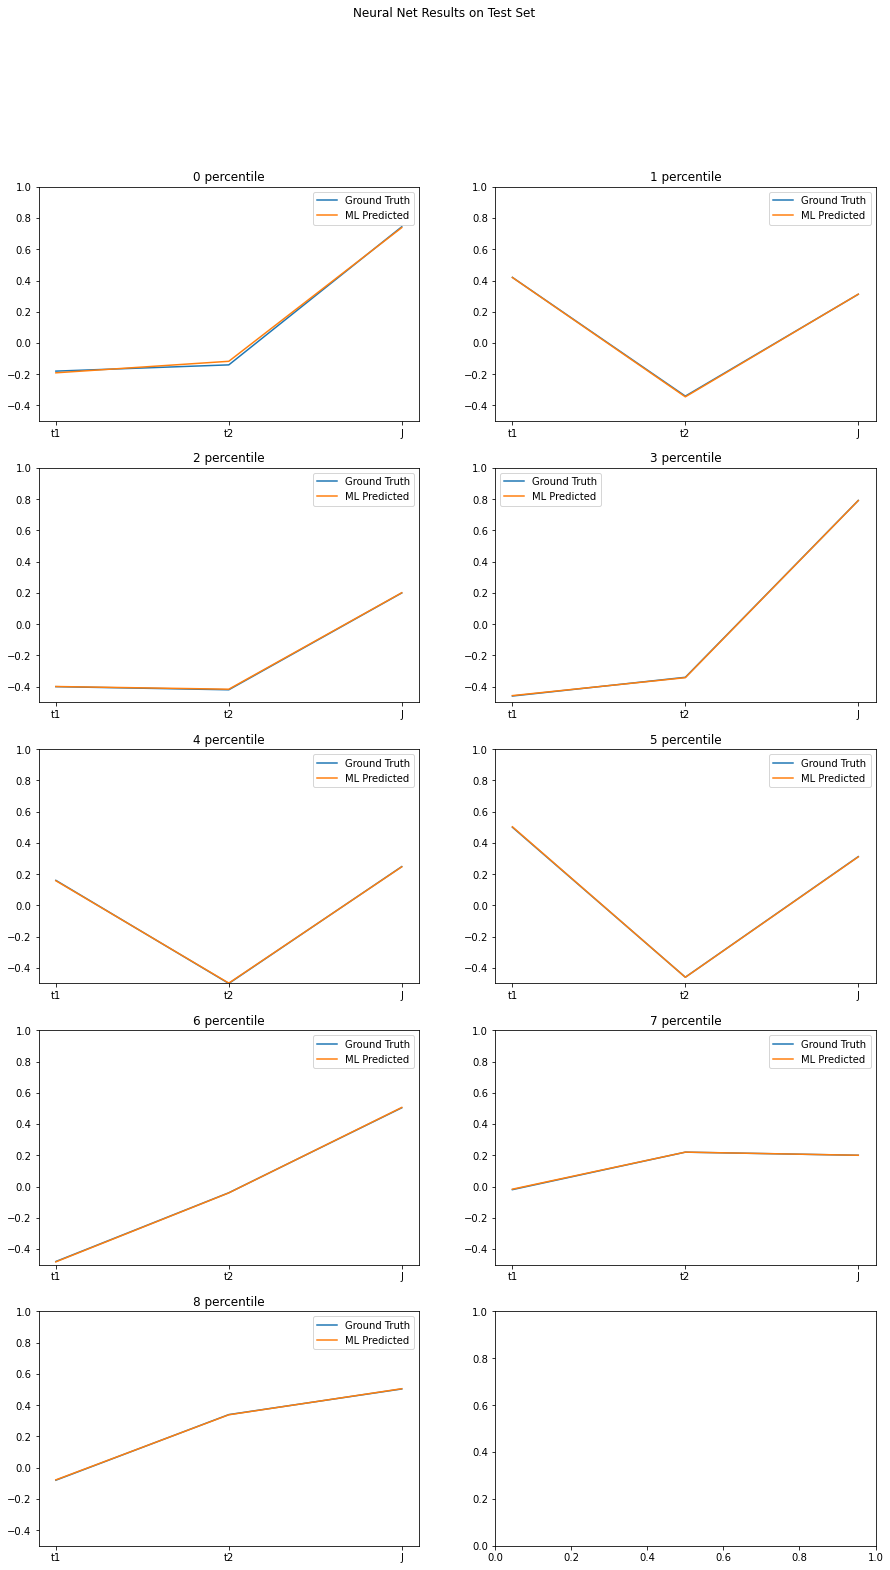

In [72]:
see_results(predicted, test_params, (5, 2), np.arange(0, 9), False)
plt.suptitle("Neural Net Results on Test Set")

0.014951542300346817